In [ ]:
import pandas as pd
from scipy import linalg as LA
from sklearn import metrics

In [ ]:
# data = pd.read_csv('Dataset-with-sentiments.csv')
data = pd.read_csv('Dataset-with-sentiments_f.csv')
data.head(5)

,Video ID,Comment ID,comments,Likes,polarity,pol_cat,stop_comments
0,olNBpijKXK0,UgxbB1bnhONxojuRHVB4AaABAg,the reason this guy cleans up youtube b...,36,0.500000,1,reason guy cleans youtube better youtube youtu...
1,olNBpijKXK0,UgwGeaisDBGo180N9s94AaABAg,my sisters obsessed with her lol,0,0.150000,1,sisters obsessed lol
2,olNBpijKXK0,UgwZeoXGyVtdNro1DZN4AaABAg,video is cringy and terrible and sup...,209,-0.208333,0,video cringy terrible super fake girl cell n't...
3,olNBpijKXK0,UgxRiDxI05a5IMZRORJ4AaABAg,a kid in my class watched her,0,0.000000,0,kid class watched
4,olNBpijKXK0,UgxKSzTOMx64G_yxFIN4AaABAg,in rebbeca zomolos videos in the descrip...,1,-0.050000,0,rebbeca zomolos videos description says thank ...


In [ ]:
sum(data['stop_comments'].isnull())


8

In [ ]:
data = data[data['stop_comments'].notnull()]

In [ ]:
sum(data['stop_comments'].isnull())

0

In [ ]:
data['pol_cat']

0       1
1       1
2       0
3       0
4       0
       ..
8137    1
8138    1
8139    0
8140    1
8141    0
Name: pol_cat, Length: 8134, dtype: int64

In [ ]:
data[data['pol_cat']==-1] = 0

In [ ]:
data['pol_cat']

0       1
1       1
2       0
3       0
4       0
       ..
8137    1
8138    1
8139    0
8140    1
8141    0
Name: pol_cat, Length: 8134, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8134 entries, 0 to 8141
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Video ID       8134 non-null   object 
 1   Comment ID     8134 non-null   object 
 2   comments       8134 non-null   object 
 3   Likes          8134 non-null   int64  
 4   polarity       8134 non-null   float64
 5   pol_cat        8134 non-null   int64  
 6   stop_comments  8134 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 508.4+ KB


In [ ]:
data['stop_comments'] = data[['stop_comments']].astype(str)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(data['stop_comments'],data['pol_cat'],test_size = 0.2,random_state = 324)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
vect = CountVectorizer()
tf_train = vect.fit_transform(X_train)
tf_test = vect.transform(X_test)

In [ ]:
tf_train = tf_train.toarray()
tf_test = tf_test.toarray()

In [ ]:
import numpy as np

from sklearn import datasets
from sklearn.linear_model import LogisticRegression as sklearnLogisticRegression

class LogisticRegression:
    """
            Purpose: To estimate Logistic regression parameters in Python.
            Inputs:
                alpha           : Is the optimisation learning rate.
                maxIterations   : Maximum number of iterations for optimisation routine..
                fitIntercept    : Include the intercept in the model fit.
                verbose         : Display program information.
                optimisation    : The optimisation routine to use. Options are:
                                            gradientAscent
                                            newton
    """
    def __init__(self, alpha=0.01, maxIterations=100000, fitIntercept=True, verbose=False,optimisation="gradientAscent"):
        self.alpha = alpha
        self.maxIterations = maxIterations  # Maximum number of times to run the optimisation.
        self.numIterations = 0;             # Record the number of iterations performed.
        self.hasConverged = False;          # This variable is used to terminate the iterations searching for optimum parameters.
        self.fitIntercept = fitIntercept
        self.verbose = verbose
        self.costHistory = [];
        self.tolerance = tol=0; # convergence tolerance;
        self.theta=[];
        self.optimisation = optimisation;

    def __add_intercept(X):
        X = X.reshape(len(X), -1)
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)

    def __sigmoid(z):
        return 1 / (1 + np.exp(-z))


    def __cost(self, X, y, theta):
        # Purpose: Logistic regression log cost function.
        z = np.dot(X, theta)
        p = LogisticRegression.__sigmoid(z)
        return (-y * np.log(p) - (1 - y) * np.log(1 - p)).mean()

    def gradientAscent(X,y,theta,alpha):
        z = np.dot(X, theta)
        p = LogisticRegression.__sigmoid(z)
        gradient = np.dot(X.T, (p - y)) / y.size;  # 1st derivative of log likelihood wrt parameters.
        theta -= alpha * gradient  # Update the parameters.

        return theta;
    
    def gradientAscent2(X,y,theta,alpha):
        z = np.dot(X, theta)
        p = LogisticRegression.__sigmoid(z)
        aux = np.dot(X.T, (p - y))
        r = np.median(np.abs(aux[aux != 0]))
        # print(r)
        if r == 0:
          r = 1/y.size;
        gradient = r*np.dot(X.T, (p - y));  # 1st derivative of log likelihood wrt parameters.
        #print(gradient)
        theta -= alpha * gradient  # Update the parameters.

        return theta;

    def newton(X,y,theta,useRegulisation=False,regulisationParameter=0):
        """ Newton optimisation method."""
        z = np.dot(X, theta)
        p = LogisticRegression.__sigmoid(z)
        W = np.diag(p * (1 - p))
        hessian = X.T.dot(W).dot(X);

        
        eig_vals, eig_vects = LA.eig(hessian)

        print(len(eig_vals))
        val = np.max(eig_vals)
        #val = 2

        if val < 0:
          val *= -1

        #val = 1/val;
        print(val)

        a = np.zeros((len(hessian), len(hessian))) #Inicializo una matriz
        np.fill_diagonal(a, np.linalg.norm(val)) # Relleno la diagonal con un valor especifico

        #print(a[0,0], np.linalg.norm(val))
        hessian = hessian + a
        

        gradient = np.dot(X.T, (y-p));  # 1st derivative of log likelihood wrt parameters.

        '''
        try:
            if useRegulisation:
                step = np.dot(np.linalg.inv(hessian + regulisationParameter * np.eye(theta)), grad)
            else:
                step = np.dot(np.linalg.inv(hessian), gradient)
        except np.linalg.LinAlgError:
            step=0;'''
        
        #print(hessian)
        print(hessian.shape)
        #print(hessian[0,0])
        hs = np.linalg.inv(hessian)
        print(hs)
        step = np.dot(hs, gradient)

        ## update the weights
        theta = theta + step

        print(theta)


        return theta;

    def fit(self, X, y):
        if self.fitIntercept:
            X = LogisticRegression.__add_intercept(X=X)


        self.theta = np.zeros(X.shape[1]);  # Initialise weights.
        alpha=self.alpha;

        cost = self.__cost(X, y, self.theta);  # Calculate the cost.
        self.costHistory.append(cost);  # Record the intitial cost for plotting.


        iterCount=0;

        while not self.hasConverged:
            # Perform the optimisation many times to reduce the cost by improving the parameters.
            iterCount+=1;                       # Counter for the number of optimisation iterations.

            # Depending on the optimisation approach. Calculate the coeffient update step differently.
            if self.optimisation=="gradientAscent":
                theta = LogisticRegression.gradientAscent(X,y,self.theta,self.alpha)
                iterDisplayVerbose = 1000;
            elif self.optimisation=="newton":
                theta = LogisticRegression.newton(X, y, self.theta)
                iterDisplayVerbose = 1;             # The number of iteration steps is significantly less than Gradient Ascent.
            elif self.optimisation=="gradientAscent2":
                theta = LogisticRegression.gradientAscent2(X,y,self.theta,self.alpha)
                iterDisplayVerbose = 1000;
            else:
                assert "unknown optimisation routine."
                return;

            cost = self.__cost(X,y, theta);     # Calculate the cost.


            if iterCount>1:
            # Only check to terminate optimisation after performing the second optimisation calculation.
                hasConverged = self.__checkConvergence(self.costHistory[-1], cost, self.tolerance,iterCount);  # Check if should terminate iteration updates as convergence tolerance has been reached.

                if hasConverged.hasConverged==True:
                    print("Iteration #:  {:>7,.0f}.  Cost: {:>+7.4f}.".format(iterCount, cost));
                    print("Finished because {}. Using {} optimisation method.".format(hasConverged.reason, self.optimisation));
                    self.numIterations = iterCount;
                    self.hasConverged == True;

                if (self.verbose == True and iterCount % iterDisplayVerbose == 0) and  hasConverged.hasConverged==False:
                    # Print out the log output.
                    print("Iteration #:  {:>7,.0f}.  Cost: {:>+7.4f}".format(iterCount, cost));


            if iterCount < 2:

                if (self.verbose == True and iterCount % iterDisplayVerbose == 0):
                    # Print out the log output.
                    print("Iteration #:  {:>7,.0f}.  Cost: {:>+7.4f}".format(iterCount, cost));

                self.theta = theta;
                self.costHistory.append(cost);  # Record the cost for plotting.
            else:
                if not (((self.optimisation == "newton") and (cost > self.costHistory[-1])) or (np.isnan(cost))) or iterCount<1:
                    # The Newton method on the last step can give coefficients well off and a worse cost as close to the singularity.
                    # Because of this. Not recording the last theta and cost found in this case and using the previous one.
                    self.theta = theta;
                    self.costHistory.append(cost);  # Record the cost for plotting.


    def __checkConvergence(self,previousCost, cost, tolerance, iterCount):
        ''' Purpose: Checks if coefficients have converged.
            Returns True if they have converged, False otherwise.'''
        costChange = np.abs(previousCost - cost)

        self.reason="";
        self.hasConverged=False;
        if (np.any(costChange < tolerance)):
            self.reason = "cost function tolerance reached";
            self.hasConverged = True;

        # If havn't reached thresholds, perform more iterations (keep training).
        if (iterCount > self.maxIterations):
            self.reason="maximum iterations reached"
            self.hasConverged = True;


        if (self.optimisation == "newton"):
            if (np.isnan(cost)):
                # The Newton method on the last step can give coefficients well off and a worse cost as close to the singularity.
                # Because of this. Not recording the last theta and cost found in this case and using the previous one.
                self.reason="singular Hessian"
                self.hasConverged = True;
            elif (cost > previousCost):
                # The Newton method on the last step can give coefficients well off and a worse cost as close to the singularity.
                # Because of this. Not recording the last theta and cost found in this case and using the previous one.
                self.reason="cost function worsoning as close to solution"
                self.hasConverged = True;



        return self


    def predict_prob(X,theta,fitIntercept=True):
        if fitIntercept:
            X = LogisticRegression.__add_intercept(X=X)

        return LogisticRegression.__sigmoid(np.dot(X, theta))

    def predict(self, X):
        #return LogisticRegression.predict_prob((X).round(),self.theta,self.fitIntercept)
        prob = LogisticRegression.predict_prob((X).round(),self.theta,self.fitIntercept)
        if (prob > 0.5):
          return 1
        return 0

    def formattedOutput(objLogisticRegression):
        """
        Purpose: To produce readable output summary of the results.
            Input:
                LogisticRegression  : A class instance containing the fitted information.
        """
        optimisationMethod=objLogisticRegression.optimisation;
        theta=objLogisticRegression.theta;
        inititialCost=objLogisticRegression.costHistory[0];
        finalCost=objLogisticRegression.costHistory[-1];
        numIterations=objLogisticRegression.numIterations;


        dash = '=' * 80; #chr(10000)*50
        print(dash)
        print("LOGISTIC REGRESSION USING {0} TERRMINATION RESULTS".format(optimisationMethod.upper()))
        print(dash)
        print("Initial Weights were:    {:>12.1f}, {:>2.1f}, {:>2.1f}.".format(0, 0, 0))
        print("   With initial cost:    {:>+12.6f}.".format(inititialCost))
        print("        # Iterations:    {:>+12,.0f}.    ".format(numIterations))
        print("       Final weights:    theta0:{:>+0.2f}, theta1:{:>+3.2f}, theta02:{:>+3.3f}.".format(
            theta[0], theta[1], theta[2]))#print("       Final weights:    \u03F4\u2080:{:>+0.2f}, \u03F4\u2081:{:>+3.2f}, \u03F4\u2082:{:>+3.3f}.".format(theta[0], theta[1], theta[2]))
        print("          Final cost:    {:>+12.6f}.".format(finalCost))
        print(dash)


In [ ]:
a = [1,0,1,0,0,3,2]
b = a[a != 0]
print(b)

0


In [ ]:
tf_train.shape

(6507, 6746)

In [ ]:
tf_test.shape

(1627, 6746)

In [ ]:
tf_train = tf_train

In [ ]:
corr_matrix = np.corrcoef(tf_train)
sumas = sum(corr_matrix >= 0.5)
indices = sumas > 1
tf_train = tf_train[~indices]

y_train = y_train[~indices]

tf_train.shape, y_train.shape

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


((2792, 6746), (2792,))

In [ ]:
tf_train = tf_train

In [ ]:
tf_train.shape

(2792, 6746)

In [ ]:
tf_test.shape

(1627, 6746)

In [ ]:
'''def run():

    #
    ## Load Data:
    #iris = datasets.load_iris()
    #X = iris.data[:, :2]
    #y = (iris.target != 0) * 1
    #

    X = tf_train
    y = y_train


    # Run the model:
    objLogisticRegression = LogisticRegression(alpha=0.1, maxIterations=10,fitIntercept=True, verbose=True,optimisation="newton");   # Initialise the regression.
    objLogisticRegression.fit(X, y);                                 # Fit the regression.

    # Show the output:
    LogisticRegression.formattedOutput(objLogisticRegression=objLogisticRegression);        # Show the formatted results.


    #
    # Run the model:
    #objLogisticRegression = LogisticRegression(alpha=0.1, maxIterations=100000,fitIntercept=True, verbose=True,optimisation="gradientAscent");   # Initialise the regression.
    #objLogisticRegression.fit(X, y);                                 # Fit the regression.

    # Show the output:
    #LogisticRegression.formattedOutput(objLogisticRegression=objLogisticRegression);        # Show the formatted results.
    #

    # sklearn's Logistic Regression.
    model = sklearnLogisticRegression(C=1e8).fit(X, y)
    dash = '=' * 80;  # '=' * 80;
    print(dash)
    print("LOGISTIC REGRESSION USING SKLEARN TERMINATION RESULTS")
    print("Final weights:    theta0:{:>+0.2f}, theta1:{:>+0.2f}, theta2:{:>+0.2f}.".format(model.intercept_[0], model.coef_[0][0], model.coef_[0][1]))
    print(dash)



    print("Finished")





if __name__ == '__main__':
    run()'''

'def run():\n\n    #\n    ## Load Data:\n    #iris = datasets.load_iris()\n    #X = iris.data[:, :2]\n    #y = (iris.target != 0) * 1\n    #\n\n    X = tf_train\n    y = y_train\n\n\n    # Run the model:\n    objLogisticRegression = LogisticRegression(alpha=0.1, maxIterations=10,fitIntercept=True, verbose=True,optimisation="newton");   # Initialise the regression.\n    objLogisticRegression.fit(X, y);                                 # Fit the regression.\n\n    # Show the output:\n    LogisticRegression.formattedOutput(objLogisticRegression=objLogisticRegression);        # Show the formatted results.\n\n\n    #\n    # Run the model:\n    #objLogisticRegression = LogisticRegression(alpha=0.1, maxIterations=100000,fitIntercept=True, verbose=True,optimisation="gradientAscent");   # Initialise the regression.\n    #objLogisticRegression.fit(X, y);                                 # Fit the regression.\n\n    # Show the output:\n    #LogisticRegression.formattedOutput(objLogisticRegression=o

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
1505    0
7368    1
4536    0
7679    1
6019    0
       ..
3954    1
6999    1
3738    1
6781    0
4858    0
Name: pol_cat, Length: 2792, dtype: int64
6746
(146.59989932311052+0j)
(6746, 6746)
[[ 6.75287471e-03  1.30056098e-07  0.00000000e+00 ... -1.51711827e-09
  -7.99850090e-09 -2.40115447e-09]
 [ 1.30056098e-07  6.64800247e-03  0.00000000e+00 ...  2.10790245e-08
   4.17754504e-08  4.62965815e-08]
 [ 0.00000000e+00  0.00000000e+00  6.82128709e-03 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [-1.51711827e-09  2.10790245e-08  0.00000000e+00 ...  6.80997230e-03
  -2.38078773e-09 -6.44937265e-10]
 [-7.99850090e-09  4.17754504e-08  0.00000000e+00 ... -2.38078773e-09
   6.76411864e-03 -2.16727379e-09]
 [-2.40115447e-09  4.62965815e-08  0.00000000e+00 ... -6.44937265e-10
  -2.16727379e-09  6.80985643e-03]]
[-0.01356153  0.03097455  0.         ... -0.003076

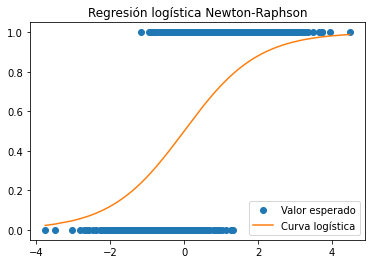

In [ ]:
import matplotlib.pyplot as plt

X = tf_train
y = y_train

print(X)
print(y)
# cc = np.cov(X)

# print('Matriz de covarianzas inicial\n', cc)

# Run the model:
objLogisticRegression = LogisticRegression(alpha=0.1, maxIterations=10,fitIntercept=False, verbose=True,optimisation="newton");   # Initialise the regression.
objLogisticRegression.fit(X, y);                                 # Fit the regression.

thet = objLogisticRegression.theta

toPx = np.dot(X, thet)

zf = 1 / (1 + np.exp(-toPx))

# print(toPx)
# print(zf)
# print(toPx.shape)
# print(zf.shape)
conc = [toPx.T, zf.T]
# print(conc)
conc = np.sort(conc)
ss1 = conc[0,:]
ss2 = conc[1,:]

plt.plot(toPx,y, 'o')
plt.plot(ss1, ss2)
plt.legend(['Valor esperado','Curva logística'])
plt.title("Regresión logística Newton-Raphson")

# Show the output:
LogisticRegression.formattedOutput(objLogisticRegression=objLogisticRegression);        # Show the formatted results.

In [ ]:
#corr_matrix = np.corrcoef(tf_test)
#sumas = sum(corr_matrix >= 0.5)
#indices = sumas > 1
#tf_test = tf_test[~indices]

#y_test = y_ttest[~indices]

#tf_test.shape, y_test.shape

In [ ]:
tf_test.shape

(1627, 6746)

In [ ]:
tf_train.shape

(2792, 6746)

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

from sklearn import metrics

In [ ]:
correctos = 0

y_train = list(y_train)

predicciones = []
for i in range(len(tf_train)):
  prediccion = objLogisticRegression.predict(tf_train[i])
  #print(prediccion)
  if (prediccion == y_train[i]):
    correctos += 1

  predicciones.append(prediccion)
print(f'Accuraccy: {correctos/len(tf_train)}')

Accuraccy: 0.9086676217765043


[[ 991  149]
 [ 106 1546]]


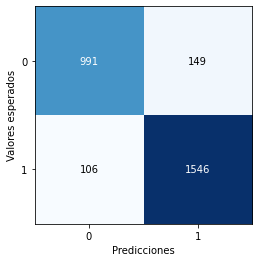

In [ ]:
cf = metrics.confusion_matrix(y_train,predicciones,labels = [1,0])
print(cf)
## this command is only for google collab 
## in the below figure " 1 is actually showing -1 and 0 is actually showing 1"
fig, ax = plot_confusion_matrix(conf_mat = cf)
plt.xlabel('Predicciones')
plt.ylabel('Valores esperados')
                                
## It canbe used in any platform
# fig, ax = plot_confusion_matrix(conf_mat = cf, class_names = [1,-1])
plt.show()

In [ ]:
print(metrics.classification_report(y_train,predicciones)

Accuraccy: 0.8045482483097726


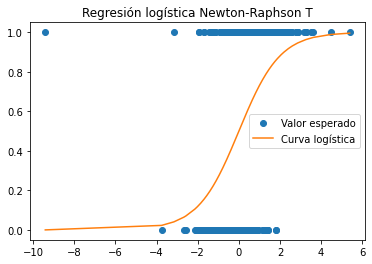

In [ ]:
correctos = 0

y_test = list(y_test)

predicciones_test = []
for i in range(len(tf_test)):
  prediccion = objLogisticRegression.predict(tf_test[i])
  #print(prediccion)
  if (prediccion == y_test[i]):
    correctos += 1

  predicciones_test.append(prediccion)

thet = objLogisticRegression.theta

toPx = np.dot(tf_test, thet)

zf = 1 / (1 + np.exp(-toPx))

conc = [toPx.T, zf.T]
conc = np.sort(conc)
ss1 = conc[0,:]
ss2 = conc[1,:]
plt.plot(toPx,y_test, 'o')
plt.plot(ss1, ss2)
plt.legend(['Valor esperado','Curva logística'])
plt.title("Regresión logística Newton-Raphson T")

print(f'Accuraccy: {correctos/len(tf_test)}')

[[505 147]
 [171 804]]


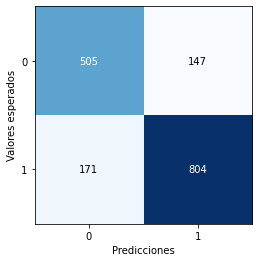

In [ ]:
cf = metrics.confusion_matrix(y_test,predicciones_test,labels = [1,0])
print(cf)
## this command is only for google collab 
## in the below figure " 1 is actually showing -1 and 0 is actually showing 1"
fig, ax = plot_confusion_matrix(conf_mat = cf)
plt.xlabel('Predicciones')
plt.ylabel('Valores esperados')
                                
## It canbe used in any platform
# fig, ax = plot_confusion_matrix(conf_mat = cf, class_names = [1,-1])
plt.show()

Text(0.5, 1.0, 'Función de costo Newton Raphson')

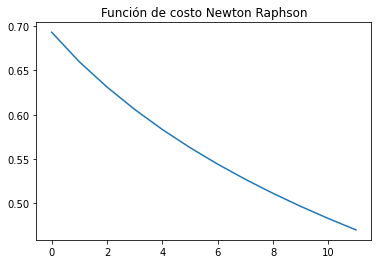

In [ ]:
plt.plot(objLogisticRegression.costHistory)
plt.title('Función de costo Newton Raphson')
plt.xlabel('Iteración')
plt.ylabel('Costo')

Iteration #:    1,000.  Cost: +0.5629
Iteration #:    2,000.  Cost: +0.5026
Iteration #:    3,000.  Cost: +0.4634
Iteration #:    3,001.  Cost: +0.4634.
Finished because maximum iterations reached. Using gradientAscent optimisation method.
LOGISTIC REGRESSION USING GRADIENTASCENT TERRMINATION RESULTS
Initial Weights were:             0.0, 0.0, 0.0.
   With initial cost:       +0.693147.
        # Iterations:          +3,001.    
       Final weights:    theta0:-0.19, theta1:+0.09, theta02:-0.021.
          Final cost:       +0.463350.


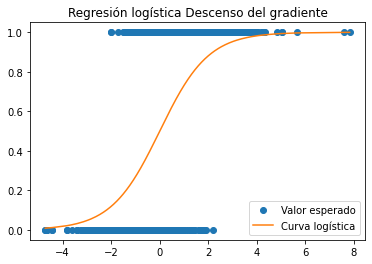

In [ ]:
import matplotlib.pyplot as plt

# Run the model:
X = tf_train
y = y_train
objLogisticRegression1 = LogisticRegression(alpha=0.1, maxIterations=3000,fitIntercept=False, verbose=True,optimisation="gradientAscent");   # Initialise the regression.
objLogisticRegression1.fit(X, y);                                 # Fit the regression.

thet = objLogisticRegression1.theta

toPx = np.dot(X, thet)

zf = 1 / (1 + np.exp(-toPx))

# print(toPx)
# print(zf)
# print(toPx.shape)
# print(zf.shape)
conc = [toPx.T, zf.T]
# print(conc)
conc = np.sort(conc)
ss1 = conc[0,:]
ss2 = conc[1,:]

plt.plot(toPx,y, 'o')
plt.plot(ss1, ss2)
plt.legend(['Valor esperado','Curva logística'])
plt.title("Regresión logística Descenso del gradiente")

# Show the output:
LogisticRegression.formattedOutput(objLogisticRegression=objLogisticRegression1);        # Show the formatted results.

In [ ]:
correctos = 0

y_train = list(y_train)

predicciones = []
for i in range(len(tf_train)):
  prediccion = objLogisticRegression1.predict(tf_train[i])
  #print(prediccion)
  if (prediccion == y_train[i]):
    correctos += 1

  predicciones.append(prediccion)
print(f'Accuraccy: {correctos/len(tf_train)}')

Accuraccy: 0.9136819484240688


[[ 997  143]
 [  98 1554]]


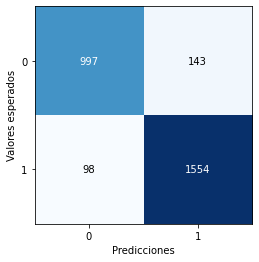

In [ ]:
cf = metrics.confusion_matrix(y_train,predicciones,labels = [1,0])
print(cf)
## this command is only for google collab 
## in the below figure " 1 is actually showing -1 and 0 is actually showing 1"
fig, ax = plot_confusion_matrix(conf_mat = cf)
plt.xlabel('Predicciones')
plt.ylabel('Valores esperados')
                                
## It canbe used in any platform
# fig, ax = plot_confusion_matrix(conf_mat = cf, class_names = [1,-1])
plt.show()

Accuraccy: 0.8070067609096496


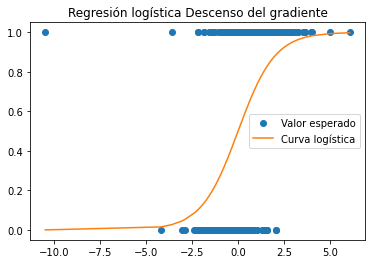

In [ ]:
correctos = 0

y_test = list(y_test)

predicciones_test = []
for i in range(len(tf_test)):
  prediccion = objLogisticRegression1.predict(tf_test[i])
  #print(prediccion)
  if (prediccion == y_test[i]):
    correctos += 1

  predicciones_test.append(prediccion)

thet = objLogisticRegression1.theta

toPx = np.dot(tf_test, thet)

zf = 1 / (1 + np.exp(-toPx))

conc = [toPx.T, zf.T]
conc = np.sort(conc)
ss1 = conc[0,:]
ss2 = conc[1,:]
plt.plot(toPx,y_test, 'o')
plt.plot(ss1, ss2)
plt.legend(['Valor esperado','Curva logística'])
plt.title("Regresión logística Descenso del gradiente")

print(f'Accuraccy: {correctos/len(tf_test)}')

[[507 145]
 [169 806]]


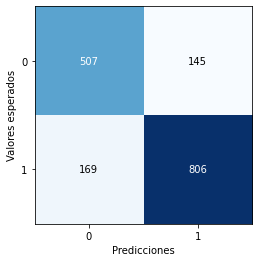

In [ ]:
cf = metrics.confusion_matrix(y_test,predicciones_test,labels = [1,0])
print(cf)
## this command is only for google collab 
## in the below figure " 1 is actually showing -1 and 0 is actually showing 1"
fig, ax = plot_confusion_matrix(conf_mat = cf)
plt.xlabel('Predicciones')
plt.ylabel('Valores esperados')
                                
## It canbe used in any platform
# fig, ax = plot_confusion_matrix(conf_mat = cf, class_names = [1,-1])
plt.show()

Text(0, 0.5, 'Costo')

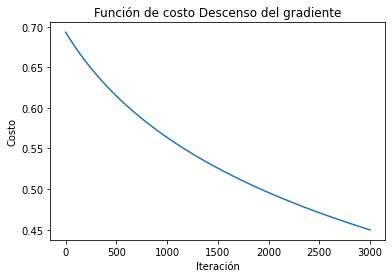

In [ ]:
plt.plot(objLogisticRegression1.costHistory)
plt.title('Función de costo Descenso del gradiente')
plt.xlabel('Iteración')
plt.ylabel('Costo')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log


Iteration #:      101.  Cost: +0.1342.
Finished because maximum iterations reached. Using gradientAscent2 optimisation method.
LOGISTIC REGRESSION USING GRADIENTASCENT2 TERRMINATION RESULTS
Initial Weights were:             0.0, 0.0, 0.0.
   With initial cost:       +0.693147.
        # Iterations:            +101.    
       Final weights:    theta0:-1.15, theta1:+0.90, theta02:+0.000.
          Final cost:       +0.134162.


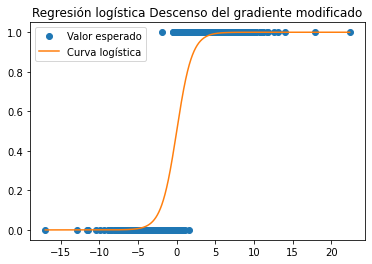

In [ ]:
import matplotlib.pyplot as plt

# Run the model:
X = tf_train
y = y_train
objLogisticRegression2 = LogisticRegression(alpha=0.1, maxIterations=200,fitIntercept=False, verbose=True,optimisation="gradientAscent2");   # Initialise the regression.
objLogisticRegression2.fit(X, y);                                 # Fit the regression.

thet = objLogisticRegression2.theta

toPx = np.dot(X, thet)

zf = 1 / (1 + np.exp(-toPx))

conc = [toPx.T, zf.T]
conc = np.sort(conc)
ss1 = conc[0,:]
ss2 = conc[1,:]

plt.plot(toPx,y, 'o')
plt.plot(ss1, ss2)
plt.legend(['Valor esperado','Curva logística'])
plt.title("Regresión logística Descenso del gradiente modificado")

# Show the output:
LogisticRegression.formattedOutput(objLogisticRegression=objLogisticRegression2);        # Show the formatted results.

In [ ]:
correctos = 0

y_train = list(y_train)

predicciones = []
for i in range(len(tf_train)):
  prediccion = objLogisticRegression2.predict(tf_train[i])
  #print(prediccion)
  if (prediccion == y_train[i]):
    correctos += 1

  predicciones.append(prediccion)

print(f'Accuraccy: {correctos/len(tf_train)}')

Accuraccy: 0.9914040114613181


[[1131    9]
 [  15 1637]]


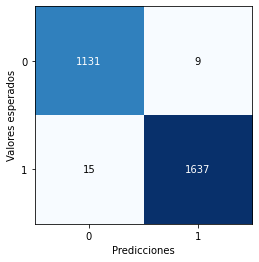

In [ ]:
cf = metrics.confusion_matrix(y_train,predicciones,labels = [1,0])
print(cf)
## this command is only for google collab 
## in the below figure " 1 is actually showing -1 and 0 is actually showing 1"
fig, ax = plot_confusion_matrix(conf_mat = cf)
plt.xlabel('Predicciones')
plt.ylabel('Valores esperados')
                                
## It canbe used in any platform
# fig, ax = plot_confusion_matrix(conf_mat = cf, class_names = [1,-1])
plt.show()

Accuraccy: 0.8426551936078672


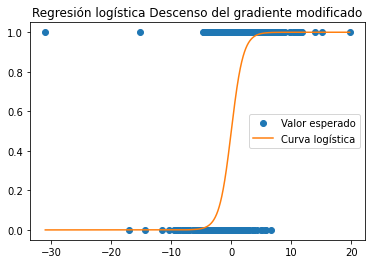

In [ ]:
correctos = 0

y_test = list(y_test)

predicciones_test = []
for i in range(len(tf_test)):
  prediccion = objLogisticRegression2.predict(tf_test[i])
  #print(prediccion)
  if (prediccion == y_test[i]):
    correctos += 1
  
  predicciones_test.append(prediccion)

thet = objLogisticRegression2.theta

toPx = np.dot(tf_test, thet)

zf = 1 / (1 + np.exp(-toPx))

conc = [toPx.T, zf.T]
conc = np.sort(conc)
ss1 = conc[0,:]
ss2 = conc[1,:]
plt.plot(toPx,y_test, 'o')
plt.plot(ss1, ss2)
plt.legend(['Valor esperado','Curva logística'])
plt.title("Regresión logística Descenso del gradiente modificado")

print(f'Accuraccy: {correctos/len(tf_test)}')

[[536 116]
 [143 832]]


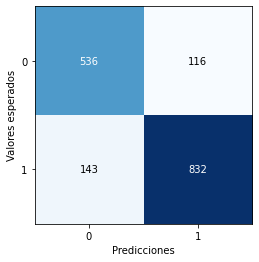

In [ ]:
cf = metrics.confusion_matrix(y_test,predicciones_test,labels = [1,0])
print(cf)
## this command is only for google collab 
## in the below figure " 1 is actually showing -1 and 0 is actually showing 1"
fig, ax = plot_confusion_matrix(conf_mat = cf)
plt.xlabel('Predicciones')
plt.ylabel('Valores esperados')
                                
## It canbe used in any platform
# fig, ax = plot_confusion_matrix(conf_mat = cf, class_names = [1,-1])
plt.show()

Text(0, 0.5, 'Costo')

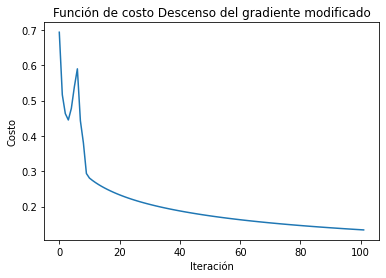

In [ ]:
plt.plot(objLogisticRegression2.costHistory)
plt.title('Función de costo Descenso del gradiente modificado')
plt.xlabel('Iteración')
plt.ylabel('Costo')